In [ ]:
# Main.py

import cv2
import numpy as np
import os

import DetectChars
import DetectPlates
import PossiblePlate

SCALAR_BLACK = (0.0, 0.0, 0.0)
SCALAR_WHITE = (255.0, 255.0, 255.0)
SCALAR_YELLOW = (0.0, 255.0, 255.0)
SCALAR_GREEN = (0.0, 255.0, 0.0)
SCALAR_RED = (0.0, 0.0, 255.0)

showSteps = False

def main():

    blnKNNTrainingSuccessful = DetectChars.loadKNNDataAndTrainKNN()         # attempt KNN training

    if blnKNNTrainingSuccessful == False:                               # if KNN training was not successful
        print("\nerror: KNN traning was not successful\n")  # show error message
        return                                                          # and exit program
    # end if

    imgOriginalScene  = cv2.imread(r"C:\Users\hp\car2_plate.png")               # open image

    if imgOriginalScene is None:                            # if image was not read successfully
        print("\nerror: image not read from file \n\n")  # print error message to std out
        os.system("pause")                                  # pause so user can see error message
        return                                              # and exit program
    # end if

    listOfPossiblePlates = DetectPlates.detectPlatesInScene(imgOriginalScene)           # detect plates

    listOfPossiblePlates = DetectChars.detectCharsInPlates(listOfPossiblePlates)        # detect chars in plates

    cv2.imshow("imgOriginalScene", imgOriginalScene)            # show scene image

    if len(listOfPossiblePlates) == 0:                          # if no plates were found
        print("\nno license plates were detected\n")  # inform user no plates were found
    else:                                                       # else

        listOfPossiblePlates.sort(key = lambda possiblePlate: len(possiblePlate.strChars), reverse = True)

        licPlate = listOfPossiblePlates[0]

        cv2.imshow("imgPlate", licPlate.imgPlate)           # show crop of plate and threshold of plate
        cv2.imshow("imgThresh", licPlate.imgThresh)

        if len(licPlate.strChars) == 0:                     # if no chars were found in the plate
            print("\nno characters were detected\n\n")  # show message
            return                                          # and exit program
        # end if
        drawRedRectangleAroundPlate(imgOriginalScene, licPlate)             # draw red rectangle around plate

        print("\nlicense plate read from image = " + licPlate.strChars + "\n")  # write license plate text to std out
        print("----------------------------------------")

        writeLicensePlateCharsOnImage(imgOriginalScene, licPlate)           # write license plate text on the image

        cv2.imshow("imgOriginalScene", imgOriginalScene)                # re-show scene image

        cv2.imwrite("imgOriginalScene.png", imgOriginalScene)           # write image out to file


    cv2.waitKey(0)
    return

def drawRedRectangleAroundPlate(imgOriginalScene, licPlate):

    p2fRectPoints = cv2.boxPoints(licPlate.rrLocationOfPlateInScene)            # get 4 vertices of rotated rect

    cv2.line(imgOriginalScene, tuple(p2fRectPoints[0]), tuple(p2fRectPoints[1]), SCALAR_RED, 2)         # draw 4 red lines
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[1]), tuple(p2fRectPoints[2]), SCALAR_RED, 2)
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[2]), tuple(p2fRectPoints[3]), SCALAR_RED, 2)
    cv2.line(imgOriginalScene, tuple(p2fRectPoints[3]), tuple(p2fRectPoints[0]), SCALAR_RED, 2)

def writeLicensePlateCharsOnImage(imgOriginalScene, licPlate):
    ptCenterOfTextAreaX = 0                             # this will be the center of the area the text will be written to
    ptCenterOfTextAreaY = 0

    ptLowerLeftTextOriginX = 0                          # this will be the bottom left of the area that the text will be written to
    ptLowerLeftTextOriginY = 0

    sceneHeight, sceneWidth, sceneNumChannels = imgOriginalScene.shape
    plateHeight, plateWidth, plateNumChannels = licPlate.imgPlate.shape

    intFontFace = cv2.FONT_HERSHEY_SIMPLEX                      # choose a plain jane font
    fltFontScale = float(plateHeight) / 30.0                    # base font scale on height of plate area
    intFontThickness = int(round(fltFontScale * 1.5))           # base font thickness on font scale

    textSize, baseline = cv2.getTextSize(licPlate.strChars, intFontFace, fltFontScale, intFontThickness)        # call getTextSize

    ( (intPlateCenterX, intPlateCenterY), (intPlateWidth, intPlateHeight), fltCorrectionAngleInDeg ) = licPlate.rrLocationOfPlateInScene

    intPlateCenterX = int(intPlateCenterX)              # make sure center is an integer
    intPlateCenterY = int(intPlateCenterY)

    ptCenterOfTextAreaX = int(intPlateCenterX)         # the horizontal location of the text area is the same as the plate

    if intPlateCenterY < (sceneHeight * 0.75):                                                  # if the license plate is in the upper 3/4 of the image
        ptCenterOfTextAreaY = int(round(intPlateCenterY)) + int(round(plateHeight * 1.6))      # write the chars in below the plate
    else:                                                                                       # else if the license plate is in the lower 1/4 of the image
        ptCenterOfTextAreaY = int(round(intPlateCenterY)) - int(round(plateHeight * 1.6))      # write the chars in above the plate
    # end if

    textSizeWidth, textSizeHeight = textSize                # unpack text size width and height

    ptLowerLeftTextOriginX = int(ptCenterOfTextAreaX - (textSizeWidth / 2))           # calculate the lower left origin of the text area
    ptLowerLeftTextOriginY = int(ptCenterOfTextAreaY + (textSizeHeight / 2))          # based on the text area center, width, and height
    cv2.putText(imgOriginalScene, licPlate.strChars, (ptLowerLeftTextOriginX, ptLowerLeftTextOriginY), intFontFace, fltFontScale, SCALAR_YELLOW, intFontThickness)
# end function

if __name__ == "__main__":
    main()




















everything is fine


True

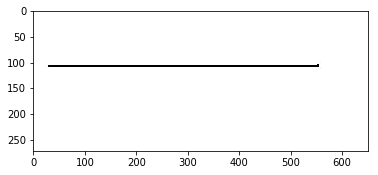

In [35]:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('Straight_line.jpg') 
  
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

plt.imshow(img)
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
#print(lines)
#print(len(lines))
if(len(lines)>2):
    print("signal crossed")
    print("photo captured")
else:
    print("everything is fine")

for r,theta in lines[0]: 
    a = np.cos(theta) 
    b = np.sin(theta) 
    x0 = a*r 
    y0 = b*r 
    x1 = int(x0 + 1000*(-b)) 
      
    y1 = int(y0 + 1000*(a)) 
  
    x2 = int(x0 - 1000*(-b)) 
      
    y2 = int(y0 - 1000*(a)) 
      
    
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
#print(x1,x2,y1,y2)


signal crossed
photo captured


True

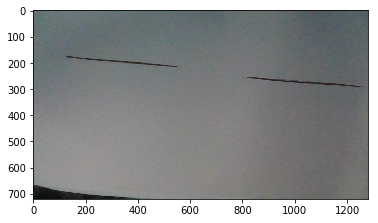

In [34]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Reading the required image in  
# which operations are to be done.  
# Make sure that the image is in the same  
# directory in which this python program is 
img = cv2.imread('stlines.jpg') 
  
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

plt.imshow(img)
# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
  
# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
#print(lines)
#print(len(lines))
if(len(lines)>2):
    print("signal crossed")
    print("photo captured")
else:
    print("everything is fine")
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
#print(x1,x2,y1,y2)


signal crossed
photo captured


True

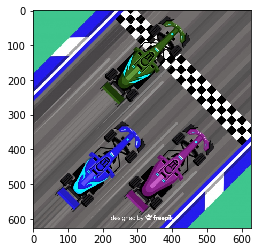

In [36]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Reading the required image in  
# which operations are to be done.  
# Make sure that the image is in the same  
# directory in which this python program is 
img = cv2.imread('carcrossed.jpg') 
  
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

plt.imshow(img)
# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
  
# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
#print(lines)
#print(len(lines))
if(len(lines)>2):
    print("signal crossed")
    print("photo captured")
else:
    print("everything is fine")
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
#print(x1,x2,y1,y2)


everything is fine


True

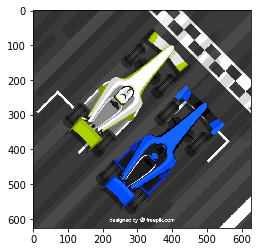

In [32]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Reading the required image in  
# which operations are to be done.  
# Make sure that the image is in the same  
# directory in which this python program is 
img = cv2.imread('carcross.jpg') 
  
# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

plt.imshow(img)
# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 
  
# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 
#print(lines)
#print(len(lines))
if(len(lines)>7):
    print("signal crossed")
    print("photo captured")
else:
    print("everything is fine")
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
#print(x1,x2,y1,y2)


"print(platenumber)\nlength=len(platenumber)\nresult1 = re.sub('[\\W_]+', '',platenumber)#removingspecialcharaters\nresult1=result1[0:10]\nprint(result1)"

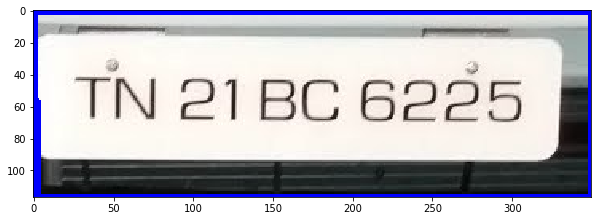

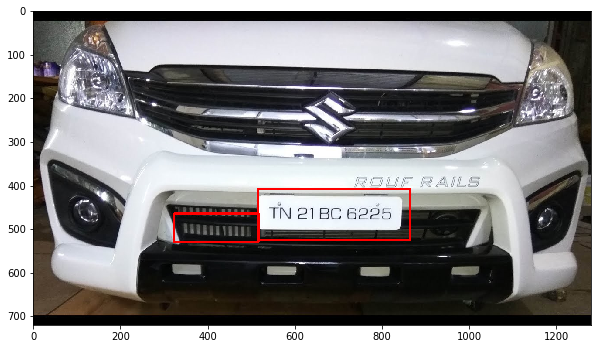

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import re

img = cv2.imread('car3_plate.jpg')
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
display(img)
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.8, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4)
        roi_color = plate_img[y:y + h, x:x + w]
        plt.imshow(roi_color)
        #global platenumber
        #platenumber=pytesseract.image_to_string(roi_color)
        #cv2.imwrite(r"C:\Users\Saiteja\datasets\Computer-Vision-with-Python\DATA\roi1_color.jpg",roi_color)
        
       
    return plate_img

result = detect_plate(img)
display(result)
'''print(platenumber)
length=len(platenumber)
result1 = re.sub('[\W_]+', '',platenumber)#removingspecialcharaters
result1=result1[0:10]
print(result1)'''

"print(platenumber)\nlength=len(platenumber)\nresult1 = re.sub('[\\W_]+', '',platenumber)#removingspecialcharaters\nresult1=result1[0:10]\nprint(result1)"

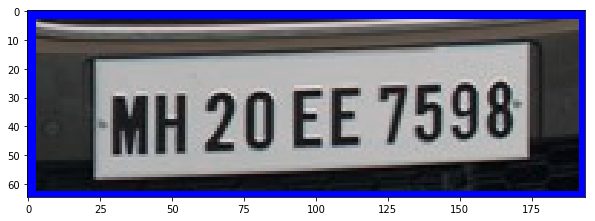

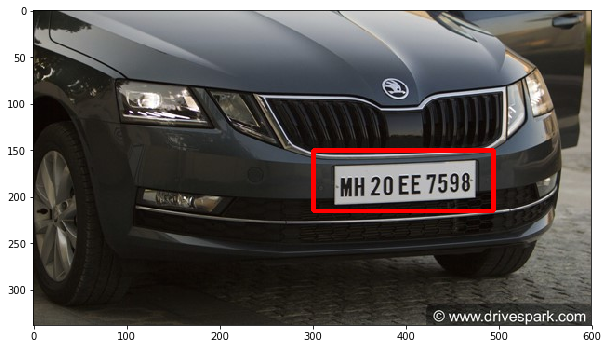

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import re

img = cv2.imread('car2_plate.jpg')
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)
display(img)
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
def detect_plate(img):
    
  
    plate_img = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.8, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 4)
        roi_color = plate_img[y:y + h, x:x + w]
        plt.imshow(roi_color)
        #global platenumber
        #platenumber=pytesseract.image_to_string(roi_color)
        #cv2.imwrite(r"C:\Users\Saiteja\datasets\Computer-Vision-with-Python\DATA\roi1_color.jpg",roi_color)
        
       
    return plate_img

result = detect_plate(img)
display(result)
'''print(platenumber)
length=len(platenumber)
result1 = re.sub('[\W_]+', '',platenumber)#removingspecialcharaters
result1=result1[0:10]
print(result1)'''